<a href="https://colab.research.google.com/github/824zzy/Code_Chips/blob/master/DataMining_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Copyright 2018 The BUPT Zhengyuan Zhu.

Licensed under the Apache License, Version 2.0 (the "License").
<table class="tfo-notebook-buttons" align="center"><td>


<td>
<a target="_blank"  href="https://github.com/BUPT/awesome-chatbot/tree/master/code"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View all sources on GitHub</a></td>
</table>

# Classification and analysis of text data
#### Affilication: BUPT
#### References
- [python3:csv文件的读写](https://blog.csdn.net/katyusha1/article/details/81606175)
- [pyhanlp 分词与词性标注](https://blog.csdn.net/FontThrone/article/details/82792377)
- [python结巴分词、jieba加载停用词表](https://blog.csdn.net/u012052268/article/details/77825981)
- [中文常用停用词表](https://github.com/goto456/stopwords)
- [python读取和存储dict()与.json格式文件](https://blog.csdn.net/qq_23926575/article/details/53054222)
- [Python爬虫之爬取动态页面数据](https://blog.csdn.net/SKI_12/article/details/78411824)
- [824zzy（朱正源）的微博爬虫](https://github.com/824zzy/Weibo_mine_hot/blob/master/weibo_mine_hot/Ultimate_ComSpider.py)
- [6 Easy Steps to Learn Naive Bayes Algorithm (with codes in Python and R)](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)
- [Naive Bayes Tutorial: Naive Bayes Classifier in Python](https://dzone.com/articles/naive-bayes-tutorial-naive-bayes-classifier-in-pyt)
- [Let's implement a Gaussian Naive Bayes classifier in Python](https://www.antoniomallia.it/lets-implement-a-gaussian-naive-bayes-classifier-in-python.html)
- [Support Vector Machines with Scikit-learn](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)
- [python中sklearn实现交叉验证](https://blog.csdn.net/ztchun/article/details/71169530)
- [Practical Text Classification With Python and Keras](https://realpython.com/python-keras-text-classification/#convolutional-neural-networks-cnn)

## Crawler demo


In [0]:
# scrapy especially for using XPATH to parse the html tree
!pip install scrapy
# a common tool for displaying the processing of ForLoop
!pip install tqdm
# package for preventing connetct lose
!pip install retrying
# speed up for efficiency of crawler
!pip install grequests
# basic package to get html
!pip install requests

    100% |████████████████████████████████| 256kB 11.5MB/s 
    100% |████████████████████████████████| 5.8MB 6.9MB/s 
    100% |████████████████████████████████| 3.1MB 13.1MB/s 
    100% |████████████████████████████████| 61kB 22.2MB/s 
    100% |████████████████████████████████| 174kB 26.5MB/s 
    100% |████████████████████████████████| 61kB 25.3MB/s 
    100% |████████████████████████████████| 2.1MB 14.3MB/s 
    100% |████████████████████████████████| 430kB 26.0MB/s 
    100% |████████████████████████████████| 102kB 29.6MB/s 
    100% |████████████████████████████████| 163kB 22.8MB/s 
  Running setup.py bdist_wheel for Twisted ... - \ | / - \ | / - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/57/2e/89/11ba83bc08ac30a5e3a6005f0310c78d231b96a270def88ca0
  Running setup.py bdist_wheel for PyDispatcher ... - done
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
  Running setup.py b

### Import packages

In [0]:
import requests
import grequests
import scrapy
from tqdm import tqdm
from retrying import retry
import time
import random
import json
import csv
import pickle

/usr/local/lib/python3.6/dist-packages/grequests.py:21: MonkeyPatchWarning: Monkey-patching ssl after ssl has already been imported may lead to errors, including RecursionError on Python 3.6. It may also silently lead to incorrect behaviour on Python 3.7. Please monkey-patch earlier. See https://github.com/gevent/gevent/issues/1016. Modules that had direct imports (NOT patched): ['urllib3.util (/usr/local/lib/python3.6/dist-packages/urllib3/util/__init__.py)', 'urllib3.util.ssl_ (/usr/local/lib/python3.6/dist-packages/urllib3/util/ssl_.py)']. 
  curious_george.patch_all(thread=False, select=False)


### Auxiliary functions for crawler

#### Generate Headers Randomly

In [0]:
userAgent_file = [
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.1 (KHTML, like Gecko) Chrome/14.0.835.163 Safari/535.1",
"Mozilla/5.0 (Windows NT 6.1; WOW64; rv:6.0) Gecko/20100101 Firefox/6.0",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/534.50 (KHTML, like Gecko) Version/5.1 Safari/534.50",
"Opera/9.80 (Windows NT 6.1; U; zh-cn) Presto/2.9.168 Version/11.50",
"Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Win64; x64; Trident/5.0; .NET CLR 2.0.50727; SLCC2; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; InfoPath.3; .NET4.0C; Tablet PC 2.0; .NET4.0E)",
"Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; InfoPath.3)",
"Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; GTB7.0)",
"Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)",
"Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1)",
"Mozilla/5.0 (Windows; U; Windows NT 6.1; ) AppleWebKit/534.12 (KHTML, like Gecko) Maxthon/3.0 Safari/534.12",
"Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; InfoPath.3; .NET4.0C; .NET4.0E)",
"Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; InfoPath.3; .NET4.0C; .NET4.0E; SE 2.X MetaSr 1.0)",
"Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.3 (KHTML, like Gecko) Chrome/6.0.472.33 Safari/534.3 SE 2.X MetaSr 1.0",
"Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; InfoPath.3; .NET4.0C; .NET4.0E)",
"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1 (KHTML, like Gecko) Chrome/13.0.782.41 Safari/535.1 QQBrowser/6.9.11079.201",
"Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; InfoPath.3; .NET4.0C; .NET4.0E) QQBrowser/6.9.11079.201",
"Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)",
]
class Headers:
    @staticmethod
    def getHeaders():
        userAgentList = []
        for line in userAgent_file:
            userAgentList.append({
                'User-Agent': line.strip(),
                #'User-Agent': 'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html) ',
                'Referer': 'http://cn.bing.com/',
                'X-Forwarded-For': '%s.%s.%s.%s' % (
                random.randint(50, 250), random.randint(50, 250), random.randint(50, 250), random.randint(50, 250)),
                'CLIENT-IP': '%s.%s.%s.%s' % (
                random.randint(50, 250), random.randint(50, 250), random.randint(50, 250), random.randint(50, 250))
            })
        userAgent = random.sample(userAgentList, 1)
        return userAgent[0]

# test case
print(Headers.getHeaders())

{'User-Agent': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)', 'Referer': 'http://cn.bing.com/', 'X-Forwarded-For': '126.119.183.52', 'CLIENT-IP': '197.89.145.103'}


### Base class for Crawlers

In [0]:
import json



class base_class(object):
  def __init__(self, website, website_url, header=None):
    """ 
    
    """
    self.cookies = {}
    self.website = website
    self.website_url = website_url
    self.header = header
    self.entrance_html = requests.get(self.website_url).content
    self.sections = self.section_list()
    
  def section_list(self):
    pass
  
  def section_urls(self):
    pass
  
  def parse_body(self):
    pass
    
  def ajax_url(self):
    pass
  
  def article_urls_dict(self):
    pass
  
  def display(self):
    pass

### Jiandan Crawler

In [0]:
class Jiandan(base_class):
  def __init__(self, **kwargs):
    super(Jiandan, self).__init__(**kwargs)
    
  def sec_subsec_dict(self, sections, sub_sections):
    sec_subsec_dict = {}
    for index, section in enumerate(sections):
      sec_subsec_dict[section] = [sub_sections[index + 7 * i] for i in range(6)]
    return sec_subsec_dict


  def section_list(self):
    """get section from each website. Sections could be seem as the label of 
       classification in the case of saving manpower.

    # Arguments:
      entrance_html:
      website:

    # Returns:
      section_urls:
    """
    section = scrapy.Selector(text=self.entrance_html).xpath('//*[@id="header"]/div[3]/ul/li[2]/div/table/thead/tr/th/text()').extract()
    return section
  
  def sub_section_list(self):
    sub_sections = scrapy.Selector(text=self.entrance_html).xpath('//*[@id="header"]/div[3]/ul/li[2]/div/table/tbody/tr/td/a/text()').extract()
    return sub_sections
  
  def section_urls(self, sub_sections):
    """get urls from each section in Jiandan website

    # Arguments:
      entrance_html:
      website:

    # Returns:
      section_urls:
    """
    section_urls = ["http://jandan.net/tag/"+item for item in sub_sections]
    return section_urls

  @retry(stop_max_attempt_number=10)
  def retry_dict_request(self, section_url):
    """
    """
    reps = (grequests.get(section_url + "/page/" + str(page)) for page in range(1, 250))
    atk_urls = []
    for rep in grequests.map(reps):
      try:
        article_urls = [scrapy.Selector(text=rep.text).xpath('//*[@id="content"]/div[' + str(i) + ']/div[2]/h2/a/@href').extract()[0] for i in range(1, 25)]
        atk_urls.append(article_urls)
      except:
        return atk_urls
      
  def sub_sec_atk_dict(self, section_dict):
    """
    """
    sec_atk_dict = {}
    for section_name, section_url in section_dict.items():
      start_time = time.time()
      atk_urls = self.retry_dict_request(section_url)
      sec_atk_dict[section_name] = atk_urls
      print("Spended ", str(int(time.time() - start_time)), " seconds on subsection ",
            section_name, " to get dictionary that section as key and article urls as value")
    return sec_atk_dict
  
  @retry(stop_max_attempt_number=10)
  def retry_page_urls(self, page_urls, section, sub_section):
    """
    
    """
    page_parsed_data = []
    reps = (grequests.get(url) for url in page_urls)
    for rep in grequests.map(reps):
      title = scrapy.Selector(text=rep.text).xpath('//*[@id="content"]/div[2]/h1/a/text()').extract()
      main_body = scrapy.Selector(text=rep.text).xpath('//*[@id="content"]/div[2]/p/text()').extract()
      body_str = ''
      for sen in main_body:
        body_str += sen
      meta_tuple = (section[0], sub_section, title[0], body_str)
      page_parsed_data.append(meta_tuple)        
    return page_parsed_data
            
  def parsing_dict(self, sec_atk_dict, section_subsection_dict):
    """ deal with ajax dynamic loading problem.

    # Arguments:
      sections: a list contains all the sections in website
      website: a str represents target website
      headers: a str we generate in previous stage

    # Returns:
      article_urls_dict: a dict whose keys are sections and values 
        are articles' urls for this section


    """
    parsed_data = []
    for sub_section, article_urls in sec_atk_dict.items():
      section = [k for k, v in section_subsection_dict.items() if sub_section in v]
      print("we are parsing section: ", sub_section, " now\n")
      start_time = time.time()
      for page_urls in tqdm(article_urls):
        page_parsed_data = self.retry_page_urls(page_urls, section, sub_section)
        parsed_data.append(page_parsed_data)
      print("Spended ", str(int(time.time()-start_time)), " seconds to parse final data on\n",
            sub_section)
#         reps = (grequests.get(article_url) for article_url in page_urls)
#         for rep in grequests.map(reps):
#           title = scrapy.Selector(text=rep.text).xpath('//*[@id="content"]/div[2]/h1/a/text()').extract()
#           main_body = scrapy.Selector(text=rep.text).xpath('//*[@id="content"]/div[2]/p/text()').extract()
#           body_str = ''
#           for sen in main_body:
#             body_str += sen
#           meta_tuple = (section[0], sub_section, article_url, title[0], body_str)
#           parsed_data.append(meta_tuple)        
    return parsed_data
  
    
  
  
  def display(self):
    """
    """
    
    
    sections = self.section_list()
    print("Sections(class label) are:", sections)
    print('\n' + '-'*50 + '\n')
    
    sub_sections = self.sub_section_list()
    print("Subsections are:", sub_sections)
    print('\n' + '-'*50 + '\n')
    
    section_subsection_dict = self.sec_subsec_dict(sections, sub_sections)
    print("The Dictionary for section as key and subsction as value is ", section_subsection_dict)
    print('\n' + '-'*50 + '\n')

    sub_section_urls = self.section_urls(sub_sections)
    print("Subsections urls are: ", sub_section_urls)
    print('\n' + '-'*50 + '\n')
    
    section_dict = dict(zip(sub_sections, sub_section_urls))
    section_article_dict = self.sub_sec_atk_dict(section_dict)
    
    print(section_article_dict)
    
    print('\n' + '-'*50 + '\n')    
    parsed_data = self.parsing_dict(section_article_dict, section_subsection_dict)
    
    print("Some examples of tuple data")
    for index in range(10):
      print(parsed_data[index])
      
    return parsed_data



In [0]:
header = Headers.getHeaders()
spider = Jiandan(website="煎蛋网", website_url="http://jandan.net/", header=header)
print('\n'*2 + '='*50 + '\n'*2)
parsed_data = spider.display()
print('\n'*2 + '='*50 + '\n'*2)





Sections(class label) are: ['科学', '技术', '极客', '脑洞', '故事', '人类', '折腾']

--------------------------------------------------

Subsections are: ['走进科学', 'TECH', 'GEEK', 'DIY', '冷新闻', '女性', '减肥', '无厘头研究', '人工智能', 'MEME', '艺术', '爷有钱', '熊孩子', '整形', '天文', '无人机', 'QUORA', '设计', '致富信息', '大丈夫', '旅游', 'NASA', '3D打印', '小学堂', '广告', '安全警示', '笨贼', '健康', '高科技', '数码产品', '创意产品', '建筑', '国内观光', '真的猛士', '教育', '环保', '虚拟现实', 'WHAT IF', '摄影', '史海钩沉', '正能量', '心理学']

--------------------------------------------------

The Dictionary for section as key and subsction as value is  {'科学': ['走进科学', '无厘头研究', '天文', 'NASA', '高科技', '环保'], '技术': ['TECH', '人工智能', '无人机', '3D打印', '数码产品', '虚拟现实'], '极客': ['GEEK', 'MEME', 'QUORA', '小学堂', '创意产品', 'WHAT IF'], '脑洞': ['DIY', '艺术', '设计', '广告', '建筑', '摄影'], '故事': ['冷新闻', '爷有钱', '致富信息', '安全警示', '国内观光', '史海钩沉'], '人类': ['女性', '熊孩子', '大丈夫', '笨贼', '真的猛士', '正能量'], '折腾': ['减肥', '整形', '旅游', '健康', '教育', '心理学']}

--------------------------------------------------

Subsections urls are:  ['

  0%|          | 0/199 [00:00<?, ?it/s]

Spended  17  seconds on subsection  心理学  to get dictionary that section as key and article urls as value
{'走进科学': [['http://jandan.net/2018/11/22/poop-cubes.html', 'http://jandan.net/2018/11/22/massive-camp-fire.html', 'http://jandan.net/2018/11/21/spider-silk-3.html', 'http://jandan.net/2018/11/21/driest-desert.html', 'http://jandan.net/2018/11/21/eating-oceans.html', 'http://jandan.net/2018/11/20/bubbles-spread.html', 'http://jandan.net/2018/11/15/origins-chocolate.html', 'http://jandan.net/2018/11/15/electrons-quantum.html', 'http://jandan.net/2018/11/13/chasing-dots.html', 'http://jandan.net/2018/11/12/flightless-bird.html', 'http://jandan.net/2018/11/12/base-metric.html', 'http://jandan.net/2018/11/11/your-genes.html', 'http://jandan.net/2018/11/11/isolation-brain.html', 'http://jandan.net/2018/11/08/dont-faint.html', 'http://jandan.net/2018/11/08/planets-round.html', 'http://jandan.net/2018/11/08/ghost-particles.html', 'http://jandan.net/2018/11/07/%e9%a3%9e%e6%9c%ba%e6%98%af%e6%

  0%|          | 0/19 [00:00<?, ?it/s]

Spended  783  seconds to parse final data on
 走进科学
we are parsing section:  TECH  now



  0%|          | 0/44 [00:00<?, ?it/s]

Spended  203  seconds to parse final data on
 TECH
we are parsing section:  GEEK  now



  0%|          | 0/15 [00:00<?, ?it/s]

Spended  578  seconds to parse final data on
 GEEK
we are parsing section:  DIY  now



  0%|          | 0/173 [00:00<?, ?it/s]

Spended  27  seconds to parse final data on
 DIY
we are parsing section:  冷新闻  now



  0%|          | 0/2 [00:00<?, ?it/s]

Spended  586  seconds to parse final data on
 冷新闻
we are parsing section:  女性  now



  0%|          | 0/10 [00:00<?, ?it/s]

Spended  4  seconds to parse final data on
 女性
we are parsing section:  减肥  now



  0%|          | 0/120 [00:00<?, ?it/s]

Spended  24  seconds to parse final data on
 减肥
we are parsing section:  无厘头研究  now



  0%|          | 0/27 [00:00<?, ?it/s]

Spended  329  seconds to parse final data on
 无厘头研究
we are parsing section:  人工智能  now



  0%|          | 0/5 [00:00<?, ?it/s]

Spended  259  seconds to parse final data on
 人工智能
we are parsing section:  MEME  now



  0%|          | 0/46 [00:00<?, ?it/s]

Spended  8  seconds to parse final data on
 MEME
we are parsing section:  艺术  now



  0%|          | 0/23 [00:00<?, ?it/s]

Spended  83  seconds to parse final data on
 艺术
we are parsing section:  爷有钱  now



  0%|          | 0/5 [00:00<?, ?it/s]

Spended  44  seconds to parse final data on
 爷有钱
we are parsing section:  熊孩子  now



  0%|          | 0/5 [00:00<?, ?it/s]

Spended  7  seconds to parse final data on
 熊孩子
we are parsing section:  整形  now



  0%|          | 0/27 [00:00<?, ?it/s]

Spended  8  seconds to parse final data on
 整形
we are parsing section:  天文  now



  0%|          | 0/4 [00:00<?, ?it/s]

Spended  162  seconds to parse final data on
 天文
we are parsing section:  无人机  now



  0%|          | 0/27 [00:00<?, ?it/s]

Spended  85  seconds to parse final data on
 无人机
we are parsing section:  QUORA  now



  0%|          | 0/54 [00:00<?, ?it/s]

Spended  179  seconds to parse final data on
 QUORA
we are parsing section:  设计  now



  0%|          | 0/41 [00:00<?, ?it/s]

Spended  106  seconds to parse final data on
 设计
we are parsing section:  致富信息  now



  0%|          | 0/13 [00:00<?, ?it/s]

Spended  206  seconds to parse final data on
 致富信息
we are parsing section:  大丈夫  now



  0%|          | 0/15 [00:00<?, ?it/s]

Spended  235  seconds to parse final data on
 大丈夫
we are parsing section:  旅游  now



  0%|          | 0/14 [00:00<?, ?it/s]

Spended  182  seconds to parse final data on
 旅游
we are parsing section:  NASA  now



  0%|          | 0/8 [00:00<?, ?it/s]

Spended  127  seconds to parse final data on
 NASA
we are parsing section:  3D打印  now



  0%|          | 0/19 [00:00<?, ?it/s]

Spended  15  seconds to parse final data on
 3D打印
we are parsing section:  小学堂  now



  0%|          | 0/3 [00:00<?, ?it/s]

Spended  153  seconds to parse final data on
 小学堂
we are parsing section:  广告  now



  0%|          | 0/18 [00:00<?, ?it/s]

Spended  4  seconds to parse final data on
 广告
we are parsing section:  安全警示  now



  0%|          | 0/5 [00:00<?, ?it/s]

Spended  31  seconds to parse final data on
 安全警示
we are parsing section:  笨贼  now



  0%|          | 0/59 [00:00<?, ?it/s]

Spended  13  seconds to parse final data on
 笨贼
we are parsing section:  健康  now



  0%|          | 0/42 [00:00<?, ?it/s]

Spended  139  seconds to parse final data on
 健康
we are parsing section:  高科技  now



  0%|          | 0/20 [00:00<?, ?it/s]

Spended  266  seconds to parse final data on
 高科技
we are parsing section:  数码产品  now



  0%|          | 0/18 [00:00<?, ?it/s]

Spended  70  seconds to parse final data on
 数码产品
we are parsing section:  创意产品  now



  0%|          | 0/19 [00:00<?, ?it/s]

Spended  110  seconds to parse final data on
 创意产品
we are parsing section:  建筑  now



  0%|          | 0/11 [00:00<?, ?it/s]

Spended  119  seconds to parse final data on
 建筑
we are parsing section:  国内观光  now



  0%|          | 0/39 [00:00<?, ?it/s]

Spended  88  seconds to parse final data on
 国内观光
we are parsing section:  真的猛士  now



  0%|          | 0/8 [00:00<?, ?it/s]

Spended  181  seconds to parse final data on
 真的猛士
we are parsing section:  教育  now



  0%|          | 0/43 [00:00<?, ?it/s]

Spended  14  seconds to parse final data on
 教育
we are parsing section:  环保  now



  0%|          | 0/4 [00:00<?, ?it/s]

Spended  87  seconds to parse final data on
 环保
we are parsing section:  虚拟现实  now



100%|██████████| 4/4 [00:12<00:00,  3.52s/it]
0it [00:00, ?it/s]
  0%|          | 0/25 [00:00<?, ?it/s]

Spended  12  seconds to parse final data on
 虚拟现实
we are parsing section:  WHAT IF  now

Spended  0  seconds to parse final data on
 WHAT IF
we are parsing section:  摄影  now



  0%|          | 0/28 [00:00<?, ?it/s]

Spended  49  seconds to parse final data on
 摄影
we are parsing section:  史海钩沉  now



  0%|          | 0/13 [00:00<?, ?it/s]

Spended  77  seconds to parse final data on
 史海钩沉
we are parsing section:  正能量  now



  0%|          | 0/39 [00:00<?, ?it/s]

Spended  25  seconds to parse final data on
 正能量
we are parsing section:  心理学  now



100%|██████████| 39/39 [03:31<00:00,  2.17s/it]

Spended  211  seconds to parse final data on
 心理学
Some examples of tuple data
[('科学', '走进科学', '为什么袋熊的便便是方块状的', '有屎以来，只有袋熊这一种生物能屙出方形的大便。11月18日在亚特兰大召开的美国物理学会流体动力学会会议上，有研究人员报告说，他们解决了这一谜团。袋熊肠道的弹性随位置变化这一特性有助于将粪便塑造成立方块，而不是其他哺乳动物的圆形颗粒状、不成型的一滩或螺旋线圈状。 。袋熊用一小堆粪便来标记它们的领土。粪块的堆积效果无疑比屎蛋更好，且不会轻易地滚动。如果你真的对袋熊便便好奇，可以。但亚特兰大乔治亚理工学院的机械工程师David Hu表示，自然界中的立方体形状非常不同寻常。制作和保持平面和棱角需要额外的能量。令人惊讶的是，袋熊的肠子——看起来和其他哺乳动物的肠子一样平平无奇——竟然能制造出这种形状的产物。后来一位澳大利亚的同行将两只因为车祸死掉的袋熊肠子装在冷藏箱里邮寄给Hu和他的同事Patricia Yang，“我们就像受到了圣诞礼物一样开心。”Hu说。Yang说，肠子里满是大便。在人类中，一根充满便便的肠道会稍微膨胀。在袋熊体内，肠道膨胀到其初始状态的两到三倍。Yang使用细长的气球——在狂欢节日中能折成各种动物的那种类型——塞进肠子里，并测量肠道不同位置的延展性。有些地方更有弹性；有些则比较韧。Yang提出，当排泄物穿过肠道时，较硬的区域可能有助于刻画出明显的边缘。将粪便塑造成方体似乎是袋熊消化道最后的工序。Hu说，在一根典型的30米长的袋熊肠道中，只有最后一米的那段范围内，才出现存在明显棱角的粪便。到那点为止，排泄物在通过肠道时逐渐凝固。袋熊的屎块成品通常都特别干燥，富含大量纤维物质。Yang认为，当它们被挤出时，这有助于保持其标志性的形状。它们可以像骰子一样摞在一起，立在任何一张额头上。(Yang确定，因为她试过了……)在野外，袋熊将它们的粪便堆在岩石或原木上作为领地的标记，有时会形成屎丘。Hu说，他们似乎更喜欢在高处蹲坑，但受到了粗短腿的限制。为了确认区域弹性的变化确实能够形成立方体，两位严谨的科学家现在正试图用连裤袜模拟袋熊消化道。'), ('科学', '走进科学', '走近科学：为啥加州山火能烧足一个月？', '从11月8号早上六点半起，

#### Write parsed data into CSV format

In [0]:
import csv
import codecs

class File_IO(object):
  def __init__(self, read_file=None, write_file=None, headers=None, data=None):
    self.read_file = read_file
    self.write_file = write_file
    self.headers = headers
    self.parsed_data = data
    
  def read_csv(self):
    """ reading CSV Files with Pandas

    # Arguments:
      name: file name of website without suffix, str

    # Returns:
      df: data frame contains 
    """
    
    with codecs.open(self.read_file + ".csv", 'r', encoding='utf-8') as csv_file:
      csv_reader = csv.reader(csv_file)
      csv_data = [row for row in csv_reader]
      csv_file.close()
    return csv_data

  def write_csv(self, seg=False):
    """ writing CSV Files with Pandas

    Arguments:
      name: file name of website text data without suffix, str

    Returns:
      f_csv: 

    """
    with codecs.open(self.write_file + '.csv', 'w', encoding='utf-8') as f:
      f_csv = csv.writer(f)
      if self.headers:
        f_csv.writerow(self.headers)
      for row in self.parsed_data:
        if not seg:
          for item in row:
            f_csv.writerow(item)
        else:
          f_csv.writerow(row)
          
      f.close()
    return f_csv
  
  def read_json(self):
    """
    Arguments:
    
    Return:
      
    """
    with codecs.open(self.read_file + '.json', 'r') as f:
      data = list()
      for line in f:
        # load values of key
        data.append(json.load(line))
      f.close()
    return data
  
  
  
  def write_json(self):
    with codecs.open(self.write_file + '.json', 'w') as f:
      json.dump(self.parsed_data, f, ensure_ascii=False)
      f.close()
    return f


In [0]:
header = ('类别', '子类别', '标题', '正文')
writer = File_IO(write_file="Jiandan_final", headers=header, data=parsed_data)
Jiandan = writer.write_csv()

100%|██████████| 1309/1309 [00:00<00:00, 1613.96it/s]


## Data Preprocessing
In this section we are going to use Jieba to deleting stop word and segementation. 


### Mount to Google Drive

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
up_drive = GoogleDrive(gauth)

from google.colab import drive
down_drive = drive.mount('/gdrive')

# # Create & upload a file.
# uploaded = drive.CreateFile({'title': 'Jiandan_final.npy'})
# uploaded.SetContentFile('Jiandan_final.npy')
# uploaded.Upload()
# print('Uploaded file with ID {}'.format(uploaded.get('id')))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
# check out mount
!ls
import os
os.chdir("../gdrive/My Drive")
!ls

adc.json	   中文停用词表.txt		       百度停用词表.txt
Jiandan_final.csv  哈工大停用词表.txt		       百度停用词表.txt.1
sample_data	   四川大学机器智能实验室停用词库.txt
 action_data_car_racing_0.npy   rnn_input_1.npy
 action_data_car_racing_1.npy   rnn_input_2.npy
 action_data_car_racing_2.npy   rnn_output_0.npy
 auth.ipynb		        rnn_output_1.npy
'CAIC Shared Code'	        rnn_output_2.npy
'Code Chips'		        rnn_weights.h5
'Colab Notebooks'	        Tensorflow_eager_mode.ipynb
 homeworks		        test_case2.ipynb
 Jiandan_final.csv	        testcase3.ipynb
 Jiandan_segment.csv	        Untitled0.ipynb
 obs_data_car_racing_0.npy      vae_weights.h5
 obs_data_car_racing_1.npy      中文停用词表.txt
 obs_data_car_racing_2.npy      哈工大停用词表.txt
 papers			        四川大学机器智能实验室停用词库.txt
 pdf			        百度停用词表.txt
 rnn_input_0.npy


### Segmentation and Delete Stop Words

In [12]:
!pip install jieba
# download a stop word dictionary from network
!wget https://raw.githubusercontent.com/goto456/stopwords/master/%E7%99%BE%E5%BA%A6%E5%81%9C%E7%94%A8%E8%AF%8D%E8%A1%A8.txt
!wget https://raw.githubusercontent.com/goto456/stopwords/master/%E5%9B%9B%E5%B7%9D%E5%A4%A7%E5%AD%A6%E6%9C%BA%E5%99%A8%E6%99%BA%E8%83%BD%E5%AE%9E%E9%AA%8C%E5%AE%A4%E5%81%9C%E7%94%A8%E8%AF%8D%E5%BA%93.txt
!wget https://raw.githubusercontent.com/goto456/stopwords/master/%E5%93%88%E5%B7%A5%E5%A4%A7%E5%81%9C%E7%94%A8%E8%AF%8D%E8%A1%A8.txt
!wget https://raw.githubusercontent.com/goto456/stopwords/master/%E4%B8%AD%E6%96%87%E5%81%9C%E7%94%A8%E8%AF%8D%E8%A1%A8.txt 
!ls

--2018-12-05 06:02:51--  https://raw.githubusercontent.com/goto456/stopwords/master/%E7%99%BE%E5%BA%A6%E5%81%9C%E7%94%A8%E8%AF%8D%E8%A1%A8.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9131 (8.9K) [text/plain]
Saving to: ‘百度停用词表.txt’

百度停用词表.txt    100%[===================>]   8.92K  --.-KB/s    in 0.001s  

2018-12-05 06:02:52 (6.97 MB/s) - ‘百度停用词表.txt’ saved [9131/9131]

--2018-12-05 06:02:54--  https://raw.githubusercontent.com/goto456/stopwords/master/%E5%9B%9B%E5%B7%9D%E5%A4%A7%E5%AD%A6%E6%9C%BA%E5%99%A8%E6%99%BA%E8%83%BD%E5%AE%9E%E9%AA%8C%E5%AE%A4%E5%81%9C%E7%94%A8%E8%AF%8D%E5%BA%93.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.git

In [13]:
## basic demo for segmentation
import jieba
from tqdm import tqdm
import re

f_o = File_IO(read_file='Jiandan_final')
corpus = f_o.read_csv()
print("Example of corpus: ", corpus[1])

print("----------")
docs = [doc[1]+doc[2]+doc[3] for doc in corpus[1:]]
labels = [doc[0] for doc in corpus[1:]]

print("Example of Segment result: ", [word for word in jieba.cut(docs[3])])
print("----------")
segmented_corpus = [jieba.cut(doc) for doc in docs]

stop_word_dict = ["中文停用词表.txt", "哈工大停用词表.txt", 
                  "四川大学机器智能实验室停用词库.txt", "百度停用词表.txt"]

stop_words_list = []
# delete stopping word
for each_dict in stop_word_dict:
  with open(each_dict, 'r') as word_file:
    stop_words = word_file.readlines()
    each_stop_words = [item[:-1] for item in stop_words]
    stop_words_list += each_stop_words

    
stop_words_list = list(set(stop_words_list))
print("\n停用词表：", stop_words_list)
print("----------")

final_corpus = []
for index, segment_list in enumerate(segmented_corpus):
  final = ''
  for seg in segment_list:
    if seg not in stop_words_list:
      if not seg.isdigit() and len(seg) == 2:
        final = final + seg + ' '
  final_corpus.append([final[:-1], labels[index]])

  
print("Example of final corpus: ", final_corpus[1])
print("----------")
f_i = File_IO(write_file='Jiandan_segment', data=final_corpus, headers=['context', 'label'])
seg_corpus = f_i.write_csv(seg=True)


Example of corpus:  ['科学', '走进科学', '为什么袋熊的便便是方块状的', '有屎以来，只有袋熊这一种生物能屙出方形的大便。11月18日在亚特兰大召开的美国物理学会流体动力学会会议上，有研究人员报告说，他们解决了这一谜团。袋熊肠道的弹性随位置变化这一特性有助于将粪便塑造成立方块，而不是其他哺乳动物的圆形颗粒状、不成型的一滩或螺旋线圈状。 。袋熊用一小堆粪便来标记它们的领土。粪块的堆积效果无疑比屎蛋更好，且不会轻易地滚动。如果你真的对袋熊便便好奇，可以。但亚特兰大乔治亚理工学院的机械工程师David Hu表示，自然界中的立方体形状非常不同寻常。制作和保持平面和棱角需要额外的能量。令人惊讶的是，袋熊的肠子——看起来和其他哺乳动物的肠子一样平平无奇——竟然能制造出这种形状的产物。后来一位澳大利亚的同行将两只因为车祸死掉的袋熊肠子装在冷藏箱里邮寄给Hu和他的同事Patricia Yang，“我们就像受到了圣诞礼物一样开心。”Hu说。Yang说，肠子里满是大便。在人类中，一根充满便便的肠道会稍微膨胀。在袋熊体内，肠道膨胀到其初始状态的两到三倍。Yang使用细长的气球——在狂欢节日中能折成各种动物的那种类型——塞进肠子里，并测量肠道不同位置的延展性。有些地方更有弹性；有些则比较韧。Yang提出，当排泄物穿过肠道时，较硬的区域可能有助于刻画出明显的边缘。将粪便塑造成方体似乎是袋熊消化道最后的工序。Hu说，在一根典型的30米长的袋熊肠道中，只有最后一米的那段范围内，才出现存在明显棱角的粪便。到那点为止，排泄物在通过肠道时逐渐凝固。袋熊的屎块成品通常都特别干燥，富含大量纤维物质。Yang认为，当它们被挤出时，这有助于保持其标志性的形状。它们可以像骰子一样摞在一起，立在任何一张额头上。(Yang确定，因为她试过了……)在野外，袋熊将它们的粪便堆在岩石或原木上作为领地的标记，有时会形成屎丘。Hu说，他们似乎更喜欢在高处蹲坑，但受到了粗短腿的限制。为了确认区域弹性的变化确实能够形成立方体，两位严谨的科学家现在正试图用连裤袜模拟袋熊消化道。']
----------
Example of Segment result:  ['走进', '科学', '超级', '沙漠', '里', '的', '生命', '甘霖', '反而', '成', '了', '死亡', '之'

### Extract processed data as DataFrame

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

print("----------")

df = pd.read_csv("Jiandan_segment.csv")

----------


## Naive Bayes implementation
In this section, we implement Naive Bayes as Baseline.

### Import Libraries


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA

### Implementation of Naive Bayes

In [0]:
from collections import Counter
from collections import defaultdict
from math import log

from exceptions import NotFittedError
from exceptions import ZeroObservationsError
from feature import ContinuousFeatureVectors
from feature import DiscreteFeatureVectors


class NaiveBayes:
    """Hybrid implementation of Naive Bayes.
    Supports discrete and continuous features.
    """

    def __init__(self, extract_features, use_smoothing=True):
        """Create a naive bayes classifier.
        :param extract_features: Callback to map a feature vector to discrete and continuous features.
        :param use_smoothing: Whether to use smoothing when calculating probability.
        """
        self.priors = defaultdict(dict)

        self.label_counts = Counter()
        self.discrete_feature_vectors = DiscreteFeatureVectors(use_smoothing)
        self.continuous_feature_vectors = ContinuousFeatureVectors()
        self._extract_features = extract_features
        self._is_fitted = False

    def fit(self, design_matrix, target_values):
        """Fit model according to design matrix and target values.
        :param design_matrix: Training examples with dimension m x n,
                              where m is the number of examples,
                              and n is the number of features.
        :param target_values: Target values with dimension m,
                              where m is the number of examples.
        :return: self
        """
        for i, training_example in enumerate(design_matrix):
            label = target_values[i]
            self.label_counts[label] += 1
            features = self._extract_features(training_example)
            for j, feature in enumerate(features):
                if feature.is_continuous():
                    self.continuous_feature_vectors.add(label, j, feature)
                else:
                    self.discrete_feature_vectors.add(label, j, feature)

        total_num_records = len(target_values)
        for label in set(target_values):
            self.priors[label] = self.label_counts[label] / total_num_records
            self.continuous_feature_vectors.set_mean_variance(label)

        self._is_fitted = True
        return self

    def predict(self, test_set):
        """Predict target values for test set.
        :param test_set: Test set with dimension m x n,
                         where m is the number of examples,
                         and n is the number of features.
        :return: Predicted target values for test set with dimension m,
                 where m is the number of examples.
        """
        self._check_is_fitted()

        predictions = []
        for i in range(len(test_set)):
            result = self.predict_record(test_set[i])
            predictions.append(result)
        return predictions

    def predict_record(self, test_record):
        """Predict the label for the test record.
        Maximizes the log likelihood to prevent underflow.
        :param test_record: Test record to predict a label for.
        :return: The predicted label.
        """
        self._check_is_fitted()

        log_likelihood = {k: log(v) for k, v in self.priors.items()}
        for label in self.label_counts:
            features = self._extract_features(test_record)
            for i, feature in enumerate(features):
                probability = self._get_probability(i, feature, label)
                try:
                    log_likelihood[label] += log(probability)
                except ValueError as e:
                    pass
        return max(log_likelihood, key=log_likelihood.get)

    def _check_is_fitted(self):
        if not self._is_fitted:
            raise NotFittedError(self.__class__.__name__)

    def _get_probability(self, feature_index, feature, label):
        if feature.is_continuous():
            probability = self.continuous_feature_vectors.probability(label,
                                                                      feature_index)
        else:
            probability = self.discrete_feature_vectors.probability(label,
                                                                    feature_index,
                                                                    feature,
                                                                    self.label_counts[label])
        return probability

###  Build Pipeline of Naive Bayes with TF-IDF  as Text feature extraction
In information retrieval or text mining, the term frequency – inverse document frequency (also called tf-idf), is a well know method to evaluate how important is a word in a document. tf-idf are is a very interesting way to convert the textual representation of information into a Vector Space Model (VSM), or into sparse features.

In [0]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
#                 ('pca', KernelPCA(n_components=10)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))
            ])

### Fit & Predict



#### **K-Fold Cross Validation**
The general idea of K cross tests is to roughly divide the data into K sub-samples. One sample is taken as the verification data and the remaining k-1 samples are taken as the training data.
#### Measure the model with Stratified k-fold
Than KFold StratifiedKFold () this function is used, the advantage of the k data data set on a percentage basis, the percentage for each category in the training set and test set are the same, so that can not have a certain categories of data in the training set and test set is not this kind of situation, also not in training all in the test set, this will lead to worse results.

In [9]:
X = df.context
y = df.label
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=824)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    NB_pipeline.fit(X_train, y_train)
    prediction = NB_pipeline.predict(X_test)
#     print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
    print(metrics.classification_report(y_test, prediction))

TRAIN: [    0     1     4 ... 31413 31414 31415] TEST: [    2     3     6 ... 31407 31408 31412]
             precision    recall  f1-score   support

         人类       1.00      0.01      0.01       370
         技术       0.96      0.06      0.11       394
         折腾       0.84      0.02      0.05       653
         故事       0.57      0.73      0.64      1412
         极客       1.00      0.10      0.19       543
         科学       0.50      0.97      0.66      2136
         脑洞       0.91      0.29      0.44       778

avg / total       0.70      0.54      0.45      6286

TRAIN: [    0     1     2 ... 31413 31414 31415] TEST: [    5    11    14 ... 31401 31409 31411]
             precision    recall  f1-score   support

         人类       1.00      0.02      0.03       370
         技术       0.92      0.03      0.05       394
         折腾       0.93      0.02      0.04       653
         故事       0.58      0.75      0.65      1411
         极客       0.98      0.08      0.16       543
       

## Support Vector Machine 

In [0]:
# Define a pipeline combining a text feature extractor with multi lable classifier
l_svm = Pipeline([
                ('tfidf', TfidfVectorizer()),
#                 ('pca', KernelPCA(n_components=10)),
                ('clf', OneVsRestClassifier(LinearSVC))
            ])

### Test Performance of Basic Linear Kernel

In [0]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    l_svm.fit(X_train, y_train)
    prediction = l_svm.predict(X_test)
#     print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
    print(metrics.classification_report(y_test, prediction))

TRAIN: [    0     1     4 ... 31413 31414 31415] TEST: [    2     3     6 ... 31407 31408 31412]
             precision    recall  f1-score   support

         人类       0.83      0.65      0.73       370
         技术       0.68      0.59      0.63       394
         折腾       0.67      0.62      0.64       653
         故事       0.84      0.90      0.87      1412
         极客       0.70      0.57      0.63       543
         科学       0.80      0.87      0.83      2136
         脑洞       0.84      0.84      0.84       778

avg / total       0.79      0.79      0.79      6286

TRAIN: [    0     1     2 ... 31413 31414 31415] TEST: [    5    11    14 ... 31401 31409 31411]
             precision    recall  f1-score   support

         人类       0.85      0.62      0.71       370
         技术       0.71      0.60      0.65       394
         折腾       0.68      0.63      0.65       653
         故事       0.84      0.91      0.87      1411
         极客       0.73      0.56      0.63       543
       

## Further More: Deep Learning Method!

### Word Embedding as Feature Extraction
Text is considered a form of sequence data similar to time series data that you would have in weather data or financial data. In the previous BOW model, you have seen how to represent a whole sequence of words as a single feature vector. Now you will see how to represent each word as vectors. There are various ways to vectorize text, such as:
- Words represented by each word as a vector
- Characters represented by each character as a vector
- N-grams of words/characters represented as a vector (N-grams are overlapping groups of multiple succeeding words/characters in the text)



#### Preprocessing text with Keras Tokenizer

In [96]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

X = df.context
# convert Chinese to number 
label_dict = {'人类': 0,
              '技术': 1,
              '折腾': 2,
              '故事': 3,
              '极客': 4,
              '科学': 5,
              '脑洞': 6,
             }
y = df.label
# for i, l in enumerate(y):
#   y[i] = label_dict[l]

print("check out numerize label:")
y_cate = to_categorical(y, num_classes=7)
print(y_cate[:10])
print("----------")
  

# Tokenize X_train data todo:change num_words 
x_tokenizer = Tokenizer(num_words=5000)
x_tokenizer.fit_on_texts(X)
X_token = x_tokenizer.texts_to_sequences(X)
vocab_size = len(x_tokenizer.word_index) + 1

print("Examples of text after tokenized is：", X_token[0])

check out numerize label:
[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
----------
Examples of text after tokenized is： [61, 12, 1445, 4, 4253, 3, 622, 1194, 1, 6, 168, 206, 3687, 814, 1986, 255, 112, 59, 867, 1225, 3187, 1232, 4394, 3571, 4594, 4334, 4195, 1225, 1080, 3990, 3234, 179, 1768, 122, 1652, 45, 1253, 907, 418, 117, 2487, 797, 123, 212, 701, 128, 418, 2159, 72, 2442, 1640, 2855, 297, 784, 4253, 5, 1102, 478, 814, 2100, 1692, 250, 814, 1692, 3688, 1576, 15, 754, 473, 4254, 306, 814, 255, 43, 1986, 209, 953, 814, 146, 1292, 1225, 3187, 1102, 1602, 3976, 814, 1225, 814, 3817, 127, 1775, 1840, 944, 196, 418, 272, 1747, 1225, 1096, 4744, 1080, 47, 943, 146, 1986, 112, 164, 1294, 405]


#### Build basic MLP as Deep Learning Baseline

In [90]:
!apt-get install python-pydot python-pydot-ng graphviz 
!pip install pydot graphviz pydot-ng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
Suggested packages:
  python-pyparsing-doc
The following NEW packages will be installed:
  python-pydot python-pydot-ng python-pyparsing
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 91.5 kB of archives.
After this operation, 443 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pyparsing all 2.2.0+dfsg1-2 [52.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pydot all 1.2.3-1 [19.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pydot-ng all 1.0.0-3 [19.8 kB]
Fetched 91.5 kB in 0s (1,262 kB/s)
Selecting previously unselected package python-pyparsing.
(Reading database ... 26721 files and directories currently installed.)
Preparing to unpack .../python-pyparsing_2.2.0+dfsg1-2_all.deb ...
Unpacking python-pypars

In [167]:
from keras.models import Sequential
from keras import layers
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import regularizers

embedding_dim = 50

mlp = Sequential()
mlp.add(layers.Embedding(input_dim=vocab_size, 
                         output_dim=embedding_dim, 
                         input_length=400))
# mlp.add(layers.Flatten())
mlp.add(layers.GlobalMaxPool1D())
mlp.add(layers.Dense(128, activation='relu', kernel_regularizer = regularizers.l2(l = 0.001)))
mlp.add(layers.Dropout(0.5))
mlp.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(l = 0.001)))
mlp.add(layers.Dropout(0.5))
mlp.add(layers.Dense(7, activation='softmax'))
mlp.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'],
           )
mlp.summary()
# SVG(model_to_dot(mlp).create(prog='dot', format='svg'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 400, 50)           4875050   
_________________________________________________________________
global_max_pooling1d_18 (Glo (None, 50)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 128)               6528      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 7)                 455       
Total para

#### Measure performance of MLP

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Validation loss')
    plt.legend()

Training Accuracy: 0.9579
Testing Accuracy:  0.7986
Training results:
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       910
          1       0.81      0.90      0.86       912
          2       0.97      0.91      0.94      1745
          3       0.99      0.98      0.99      3629
          4       0.86      0.89      0.87      1307
          5       0.98      0.98      0.98      5262
          6       0.98      0.97      0.98      1943

avg / total       0.96      0.96      0.96     15708

Testing results:
             precision    recall  f1-score   support

          0       0.76      0.82      0.79       876
          1       0.41      0.52      0.46       756
          2       0.71      0.64      0.67      1825
          3       0.96      0.91      0.94      3662
          4       0.58      0.62      0.60      1263
          5       0.84      0.85      0.85      5356
          6       0.82      0.82      0.82      1970

avg / t

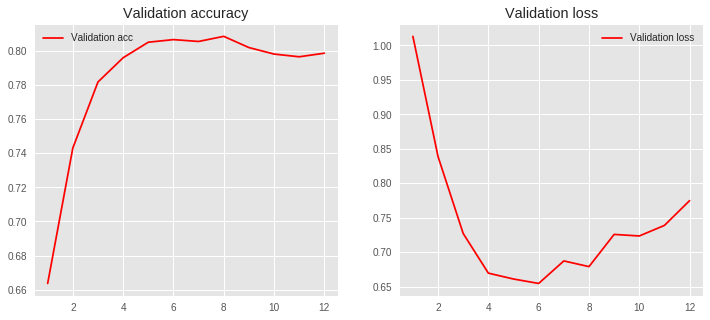

In [169]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_token, y_cate, test_size=0.5, random_state=824, shuffle=True)

X_train, X_test = pad_sequences(X_train, padding='post', maxlen=400),\
                  pad_sequences(X_test, padding='post', maxlen=400)

history = mlp.fit(X_train, y_train,
                  epochs=12,
                  verbose=0,
                  validation_data=(X_test, y_test),
                  batch_size=32)

loss, accuracy = mlp.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = mlp.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


mlp_train = mlp.predict_classes(X_train)
mlp_pred = mlp.predict_classes(X_test)
print("Training results:")
print(metrics.classification_report(mlp_train, np.argmax(y_train, axis=1)))
print("Testing results:")
print(metrics.classification_report(mlp_pred, np.argmax(y_test, axis=1)))


### CNN
![](https://files.realpython.com/media/njanakiev-1d-convolution.d7afddde2776.png)

### Conv1D
Keras offers again various Convolutional layers which you can use for this task. The layer you’ll need is the Conv1D layer. This layer has again various parameters to choose from.

In [170]:
embedding_dim = 100

Conv = Sequential()
Conv.add(layers.Embedding(vocab_size, embedding_dim, input_length=400))
Conv.add(layers.Conv1D(128, 5, activation='relu'))
Conv.add(layers.GlobalMaxPooling1D())
Conv.add(layers.Dense(10, activation='relu'))
Conv.add(layers.Dense(7, activation='softmax'))
Conv.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
Conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 400, 100)          9750100   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 396, 128)          64128     
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 128)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_87 (Dense)             (None, 7)                 77        
Total params: 9,815,595
Trainable params: 9,815,595
Non-trainable params: 0
_________________________________________________________________


#### Measure the performance of basic CNN

Train on 15708 samples, validate on 15708 samples
Epoch 1/15
15708/15708 [==============================] - 15s 969us/step - loss: 0.9796 - acc: 0.6449 - val_loss: 0.4997 - val_acc: 0.8338
Epoch 2/15
15708/15708 [==============================] - 12s 754us/step - loss: 0.3551 - acc: 0.8842 - val_loss: 0.4127 - val_acc: 0.8605
Epoch 3/15
15708/15708 [==============================] - 12s 751us/step - loss: 0.1478 - acc: 0.9586 - val_loss: 0.4435 - val_acc: 0.8560
Epoch 4/15
15708/15708 [==============================] - 12s 750us/step - loss: 0.0430 - acc: 0.9936 - val_loss: 0.5070 - val_acc: 0.8552
Epoch 5/15
15708/15708 [==============================] - 12s 753us/step - loss: 0.0116 - acc: 0.9991 - val_loss: 0.5598 - val_acc: 0.8543
Epoch 6/15
15708/15708 [==============================] - 12s 751us/step - loss: 0.0046 - acc: 0.9995 - val_loss: 0.5941 - val_acc: 0.8571
Epoch 7/15
15708/15708 [==============================] - 12s 751us/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.

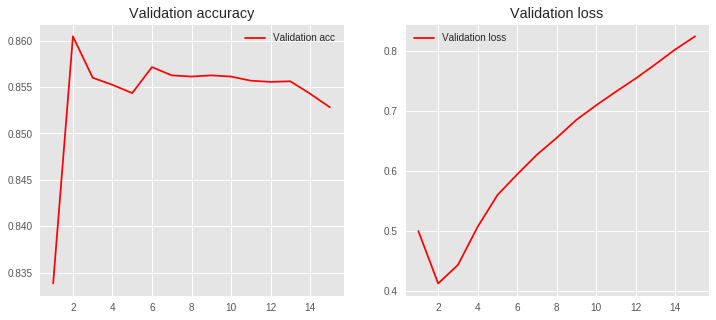

In [171]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(X_token, y_cate, test_size=0.5, random_state=824, shuffle=True)

# X_train, X_test = pad_sequences(X_train, padding='post', maxlen=400),\
#                   pad_sequences(X_test, padding='post', maxlen=400)

history = Conv.fit(X_train, y_train,
                  epochs=15,
                  verbose=1,
                  validation_data=(X_test, y_test),
                  batch_size=32)

loss, accuracy = Conv.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = Conv.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


Conv_train = Conv.predict_classes(X_train)
Conv_pred = Conv.predict_classes(X_test)
print("Training results:")
print(metrics.classification_report(Conv_train, np.argmax(y_train, axis=1)))
print("Testing results:")
print(metrics.classification_report(Conv_pred, np.argmax(y_test, axis=1)))


#### Deeper CNN

In [190]:
embedding_dim = 100

DConv = Sequential()
DConv.add(layers.Embedding(vocab_size, embedding_dim, input_length=400))
DConv.add(layers.Conv1D(64, 5, activation='relu'))
DConv.add(layers.Conv1D(64, 5, activation='relu'))
DConv.add(layers.GlobalMaxPooling1D())
DConv.add(layers.Dropout(0.25))
DConv.add(layers.Conv1D(128, 5, activation='relu'))
DConv.add(layers.Conv1D(128, 5, activation='relu'))
DConv.add(layers.GlobalMaxPooling1D())
DConv.add(layers.Dropout(0.25))
model.add(layers.Flatten())
DConv.add(layers.Dense(32, activation='relu'))
DConv.add(layers.Dense(7, activation='softmax'))
DConv.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
DConv.summary()



ValueError: ignored

In [0]:
history = DConv.fit(X_train, y_train,
                  epochs=15,
                  verbose=1,
                  validation_data=(X_test, y_test),
                  batch_size=64)

loss, accuracy = DConv.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = DConv.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


DConv_train = DConv.predict_classes(X_train)
DConv_pred = DConv.predict_classes(X_test)
print("Training results:")
print(metrics.classification_report(DConv_train, np.argmax(y_train, axis=1)))
print("Testing results:")
print(metrics.classification_report(DConv_pred, np.argmax(y_test, axis=1)))


### RNN

In [186]:
LSTM = Sequential()
LSTM.add(layers.Embedding(vocab_size, 100, input_length=400))
LSTM.add(layers.CuDNNLSTM(64))
LSTM.add(layers.Dense(128, activation='relu'))
LSTM.add(layers.Dropout(0.5))
LSTM.add(layers.Dense(64, activation='relu'))
LSTM.add(layers.Dropout(0.5))
LSTM.add(layers.Dense(32, activation='relu'))
LSTM.add(layers.Dense(7, activation='softmax'))

LSTM.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_49 (Embedding)     (None, 400, 100)          9750100   
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 64)                42496     
_________________________________________________________________
dense_91 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 32)                2080      
__________

Train on 15708 samples, validate on 15708 samples
Epoch 1/20
15708/15708 [==============================] - 12s 743us/step - loss: 1.7609 - acc: 0.3367 - val_loss: 1.7517 - val_acc: 0.3430
Epoch 2/20
15708/15708 [==============================] - 12s 740us/step - loss: 1.7536 - acc: 0.3369 - val_loss: 1.7463 - val_acc: 0.3430
Epoch 3/20
15708/15708 [==============================] - 12s 739us/step - loss: 1.7523 - acc: 0.3369 - val_loss: 1.7465 - val_acc: 0.3430
Epoch 4/20
15708/15708 [==============================] - 12s 734us/step - loss: 1.7498 - acc: 0.3377 - val_loss: 1.7463 - val_acc: 0.3431
Epoch 5/20
15708/15708 [==============================] - 12s 738us/step - loss: 1.7478 - acc: 0.3381 - val_loss: 1.7479 - val_acc: 0.3431
Epoch 6/20
15708/15708 [==============================] - 12s 738us/step - loss: 1.7462 - acc: 0.3381 - val_loss: 1.7484 - val_acc: 0.3431
Epoch 7/20
15708/15708 [==============================] - 12s 738us/step - loss: 1.7497 - acc: 0.3383 - val_loss: 1.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


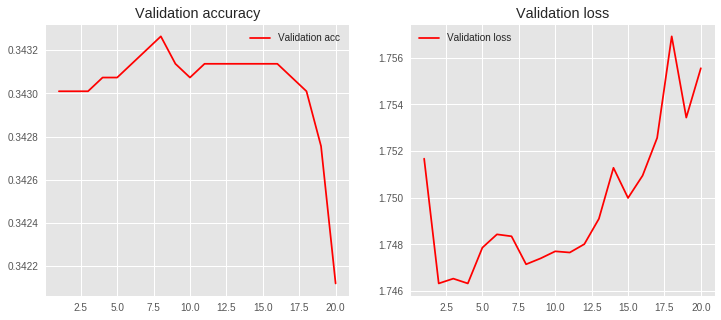

In [188]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(X_token, y_cate, test_size=0.5, random_state=824, shuffle=True)

# X_train, X_test = pad_sequences(X_train, padding='post', maxlen=400),\
#                   pad_sequences(X_test, padding='post', maxlen=400)

history = LSTM.fit(X_train, y_train,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_test, y_test),
                  batch_size=128)

loss, accuracy = LSTM.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = LSTM.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


LSTM_train = LSTM.predict_classes(X_train)
LSTM_pred = LSTM.predict_classes(X_test)
print("Training results:")
print(metrics.classification_report(LSTM_train, np.argmax(y_train, axis=1)))
print("Testing results:")
print(metrics.classification_report(LSTM_pred, np.argmax(y_test, axis=1)))


## Conclusion